In [46]:
import requests
from bs4 import BeautifulSoup

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from collections import Counter
import json,re,random
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import spacy

#preparing the tools


ps = PorterStemmer()
lz = WordNetLemmatizer()
en_stopwords = stopwords.words('english')


In [2]:
# Load SpaCy models
nlp_sm = spacy.load("en_core_web_sm")
nlp_trf = spacy.load("en_core_web_trf")

In [ ]:
# Run if SpaCy model hasn't been downloaded before
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_trf

In [ ]:
# Need to run if stopwords not downloaded before.
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [3]:
sample_file = './reviewSamples20.json'

# Clean data
def clean_text(sum_string):
    s = re.sub('[\r\n\s]+',' ',sum_string) #clean whitespce and newline
    return s

#data importing and formating
def process_raw_data(data_in_weird_format_file):
    with open(data_in_weird_format_file,'r') as f:
        raw_data = f.read()
    data = raw_data.split('}\n')
    return [x+'}' for x in data if x != '']
data = process_raw_data(sample_file)
print(f'Processed {len(data)} lines of data')

_sample_data = json.loads(random.choice(data))
print('\n\nSample data')
print(json.dumps(_sample_data, indent=4, sort_keys=True))



Processed 20 lines of data


Sample data
{
    "business_id": "Z66xO_B7trDah8F0PKwRqg",
    "cool": 0,
    "date": "2018-05-28 20:32:27",
    "funny": 0,
    "review_id": "Pin7lN2A9XzBVpzgq4-wgQ",
    "stars": 4.0,
    "text": "We stopped by for a little shopping. The mall is nicer than most and has plenty of stores. It was a nice way to spend a few hours before heading on to another adventure.",
    "useful": 1,
    "user_id": "EYnRRWIOlxKcylR457hSMg"
}


In [4]:
#Check if they have the same keys
json_list = [json.loads(x) for x in data]
for i,_json in enumerate(json_list):
    print(f"{i}\t{_json.keys()}")

0	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
1	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
2	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
3	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
4	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
5	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
6	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
7	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
8	dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])
9	dict_keys(['review_id', 'user_id', 'business_id', 'st

In [5]:
big_data_file = './reviewSelected100.json'

big_data = process_raw_data(big_data_file)

big_json = [json.loads(x) for x in big_data]

#Collecting all unique the business id
business_id_list = list({x['business_id'] for x in big_json})  #make it a set via set comprehension {}, then call tolist

#Selecting a random business and their review
chosen_id_1 = random.choice(business_id_list)
chosen_business_1 = [x for x in big_json if x['business_id'] == chosen_id_1]

chosen_id_2 = chosen_id_1
while chosen_id_2 == chosen_id_1:
    chosen_id_2 = random.choice(business_id_list)
chosen_business_2 = [x for x in big_json if x['business_id'] == chosen_id_2]
#Because we have to repeat the whole thing for 2 businesses, we need to wrap the functions into a single wrapper for reuse


In [6]:
for y in ['useful','stars','funny','cool']:
    print({y:Counter(x[y] for x in big_json)})
    print()

{'useful': Counter({0: 8238, 1: 3265, 2: 1552, 3: 805, 4: 442, 5: 280, 6: 164, 7: 122, 8: 76, 9: 67, 10: 51, 11: 50, 12: 32, 13: 29, 14: 21, 15: 18, 16: 10, 20: 9, 19: 7, 22: 7, 23: 6, 24: 6, 18: 6, 17: 5, 21: 5, 25: 4, 30: 4, 28: 2, 34: 2, 31: 2, 27: 1, 40: 1, 65: 1, 35: 1, 46: 1, 41: 1, 48: 1, 36: 1, 85: 1, 191: 1, 43: 1, 59: 1, 64: 1})}

{'stars': Counter({5.0: 6159, 4.0: 3559, 1.0: 2306, 3.0: 1904, 2.0: 1372})}

{'funny': Counter({0: 12268, 1: 1862, 2: 563, 3: 231, 4: 107, 5: 81, 6: 61, 7: 31, 9: 21, 8: 17, 10: 10, 11: 9, 13: 6, 19: 4, 12: 4, 25: 3, 15: 3, 17: 2, 16: 2, 35: 2, 20: 2, 40: 2, 28: 2, 33: 1, 18: 1, 14: 1, 122: 1, 38: 1, 56: 1, 43: 1})}

{'cool': Counter({0: 11607, 1: 2299, 2: 734, 3: 259, 4: 115, 5: 74, 6: 57, 7: 31, 9: 27, 8: 18, 10: 15, 13: 11, 11: 10, 12: 9, 14: 5, 18: 5, 15: 3, 19: 2, 60: 2, 17: 2, 24: 2, 20: 2, 32: 1, 44: 1, 43: 1, 16: 1, 40: 1, 34: 1, 82: 1, 23: 1, 22: 1, 180: 1, 41: 1})}



In [7]:

#Wrapper for analysis  -- not too sure if the inside functions should throw outside anot it's quite task specific
def analyze_business(chosen_business):
    
    #collating all reviews into one string
    all_dem_reviews = ''.join([x['text'] for x in chosen_business])


    all_dem_clean_reviews = clean_text(all_dem_reviews)

    #for word distribution, we need to clean all punctuations and symbols as well as standardize the case
    def build_word_frequency(text,blacklist=[],stemmer=None):
        assert type(text) == str, "Expecting a str input"
        s = re.sub('[^a-z]+',' ',text.lower())
        s = re.sub('[\n\r\s]+',' ',s)
        vocab = Counter()
        for word in s.split(' '):
            if word in blacklist:
                continue
            if stemmer!= None:
                word = stemmer.stem(word)
            vocab.update([word])  #preventing the counter object to update using each letter by using []
        return vocab

    review_vocab_bef_stem = build_word_frequency(all_dem_clean_reviews,blacklist=en_stopwords)
    review_vocab_after_stem = build_word_frequency(all_dem_clean_reviews,blacklist=en_stopwords,stemmer = ps)

    print("Before stemming, most 10 common words:")
    for x in review_vocab_bef_stem.most_common(10):
        print('\t',x[0].ljust(15,' '),x[1])  #justify the column abit

    print('\n\n')

    print("After stemming, most 10 common words:")
    for x in review_vocab_after_stem.most_common(10):
        print('\t',x[0].ljust(15,' '),x[1])
    
    #Plotting the word distribution
    def plot_word_freq_dist(the_vocab):
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

        line = ax.plot(the_vocab.values())

        ax.set_yscale('log')
        plt.show()

    plot_word_freq_dist(review_vocab_after_stem)
        


Before stemming, most 10 common words:
	 spa             75
	 massage         61
	 time            56
	 door            47
	 red             46
	 back            42
	 experience      41
	 great           37
	 would           34
	 facial          33



After stemming, most 10 common words:
	 spa             87
	 massag          75
	 time            63
	 servic          57
	 door            47
	 red             46
	 facial          44
	 experi          44
	 go              44
	 back            43


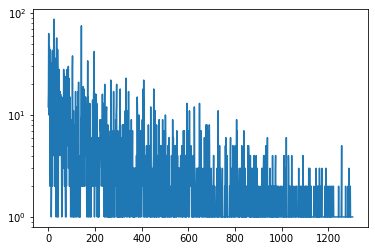

In [26]:
analyze_business(chosen_business_1)

Before stemming, most 10 common words:
	 food            155
	 truck           108
	 catfish         94
	 cajun           64
	 jamburrito      53
	 good            51
	 chicken         50
	 burrito         45
	 hush            41
	 jamburritos     41



After stemming, most 10 common words:
	 food            158
	 truck           131
	 catfish         94
	 jamburrito      94
	 cajun           64
	 good            57
	 burrito         55
	 tri             53
	 chicken         50
	 like            41


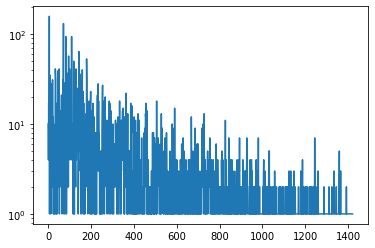

In [27]:
analyze_business(chosen_business_2)

## 3.2.2 POS Tagging

```
 git blame manekiyong
```
TBD:
* Compare with another Library?
* Compare token.tag_ vs token.pos_ (fine-grained vs coarse grained)

In [43]:
def analyze_pos(sampled_reviews):
    for review in sampled_reviews:
        cleaned_review = clean_text(review['text'])
        print(cleaned_review)
        tokenized_review = word_tokenize(cleaned_review)
        print(nltk.pos_tag(tokenized_review)) #NLTK POS taggers uses tag from the Penn Tree Bank tagset. 
        print("")
        # To find another POS Tagging technique for comparison
        
def pos_spacy(sampled_reviews):
    #sm F1 for POS 0.97, trf F1 for POS 0.98
    pos_df = pd.DataFrame(columns=["token", "sm_pos", "trf_pos", "match"])
    for review in sampled_reviews:
        doc_sm = nlp_sm(review['text'])
        doc_trf = nlp_trf(review['text'])
        for token_sm, token_trf in zip(doc_sm, doc_trf):
            temp_dict = {
                "token":str(token_sm),
                "sm_pos":token_sm.pos_,
                "trf_pos":token_trf.pos_,
                "match":token_trf.pos_== token_sm.pos_
            }
            pos_df=pos_df.append(temp_dict, ignore_index=True)
    return pos_df

In [44]:
random_reviews = random.sample(big_json,5)
# analyze_pos(random_reviews)
df = pos_spacy(random_reviews)

In [64]:
# tokenized_review = word_tokenize(random_reviews[0]['text'])
# doc_trf = nlp_trf(random_reviews[0]['text'])
# print(len(tokenized_review))
# len(doc_trf)
# for index, i in enumerate(doc_trf):
#     print(i, tokenized_review[index])

In [10]:
df

,token,sm_pos,trf_pos,match
0,So,ADV,CCONJ,False
1,I,PRON,PRON,True
2,went,VERB,VERB,True
3,here,ADV,ADV,True
4,again,ADV,ADV,True
...,...,...,...,...
659,I,PRON,PRON,True
660,will,AUX,AUX,True
661,be,VERB,VERB,True
662,back,ADV,ADV,True


## 3.2.3 Writing Styles

Discussion points based on the formality of the way of writing, proper use of English sentence structure such as good grammar, proper pronouns, capitalization, and terms used in the posts.

### Stack Overflow
Stack Overflow has a relatively less formal way of writing. Informal words like "Doesn't, I'm, I've..." are more prevalent that its counterpart. In general, we could observe decent use of English and sentence structure. However, that could be better. In many posts, the start of their sentences and bullet points are not capitalised. Moreover, usage of some words are incorrect e.g. Conjunctions used in the post body "So I can filter them out..." or "And now we see that using ...". It is worth noting that there are technical terms and codes used in Stack Overflow that could be Out Of Vocabulary (OOV) words. For example, tree_.__getstate__() and graphviz' .dot file are used in the posts but the words are OOV. Therefore, tokenization need to be altered to account for unknown tokens (UNKs). Similarly, we should use a software-specific POS tagger to handle the text from Stack Overflow.


### Hardware Zone
Hardware Zone has two main components - news and forums. The news portion is similar to Channel NewsAsia as most of the news are retrieved from proper news websites, our group will be focusing on the forums. The forums are filled with informal way of writing. The users are mainly Singaporeans, which can explain the common use of Singlish, improper English and structure. On one of the posts - 'any reviews for their boxes? like streams always buffering??', we can observe the lack of capitalisation, use of broken English and exccessive use of punctuation. For another post, it utilised Singlish - 'Change to dark mode lor'. There is also frequent use of emojis or expressions in many posts. Hence, the terms used could be less complex in Hardware Zone as there is very little complex technical terms and unique words used as compared to Stack Overflow.

### Channel NewsAsia
Channel NewsAsia is a news platform. The journalists are proficient in English and there are many layers of vetting before a post is published. On that account, Channel NewsAsia has a formal way of writing, the most proper use of English sentence structure as compared to the other two counterparts. The posts have proper punctuations and sentence structures. Each sentence is gramatically correct, has capitalisation at the start and proper nouns are capitalised. There might be some unknown terms used such as 'Oxbotica' or 'AppliedEV' but with proper sentence structures, there is enough context to understand. Out of all 3  websites, it would be the easiest to apply tokenization and POS tagging directly to this news posts.

Sources:
Stack Overflow
https://stackoverflow.com/questions/32506951/how-to-explore-a-decision-tree-built-using-scikit-learn
https://stackoverflow.com/questions/3437059/does-python-have-a-string-contains-substring-method

Hardware Zone
https://forums.hardwarezone.com.sg/threads/new-forum-bugs-reporting-list.6488755/
https://forums.hardwarezone.com.sg/threads/android-tv-box.5678618/

Channel NewsAsia
https://www.channelnewsasia.com/business/oxbotica-develop-multi-purpose-self-driving-vehicle-appliedev-2162676
https://www.channelnewsasia.com/business/new-zealand-banks-post-office-hit-outages-apparent-cyber-attack-2162891

## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating.

```
git blame sun aixin

consider word cloud
```

Limitations: 
* Assuming i have a phrase: `Not a good thing | RB | DT | JJ | NN | ` , solely looking at ADJ NOUN here would discard the negation (Not)
* Since we are only analyzing English text, some foreign cuisines may not be captured; for example, `dolsot bibimbap` would be seen as proper noun, but in actual fact, it is translated to `Hot stone pot bibimbap`

In [102]:
def generate_phrase_dict(review_list):
    phrase_dict = {}
    adj_list = ['JJ', 'JJR', 'JJS'] #JJ: Adjective; JJR: comparative adjective; JJS: superlative adjective
    noun_list = ['NN', 'NNS', 'NNP', 'NNPS'] #NN: Singular Noun; #NNS: Plural Noun; #NNP: Singular Proper Noun, #NNPS: Plural Proper Noun
    for review in review_list:
        doc = nlp_trf(review['text'])
        for phrase in doc.noun_chunks:
            start = -1
            fin = -1
            print(phrase, end=" | ")
            for index, i in enumerate(phrase):
                print(i.tag_, end=" | ")
                if i.tag_ in adj_list and start == -1:

                    start = index
            for index, i in enumerate(reversed(phrase)):
                if i.tag_ in noun_list and fin == -1:
                    fin = len(phrase)-index
                    break
            print("")
            if start==-1 or fin==-1:
                print("No adj-noun found")
            else:
                print("Phrase:", phrase[start:fin])
                sub_phrase = str(phrase[start:fin]).lower()
                if sub_phrase in phrase_dict:
                    phrase_dict[sub_phrase] = phrase_dict[sub_phrase]+1
                else:
                    phrase_dict[sub_phrase]=1
            print("")     
    return phrase_dict

In [106]:
# Populate individual list by stars
stars_1 = []
stars_2 = []
stars_3 = []
stars_4 = []
stars_5 = []
for i in big_json:
    if i['stars']==1:
        stars_1.append(i)
    elif i['stars'] == 2:
        stars_2.append(i)
    elif i['stars'] ==3:
        stars_3.append(i)
    elif i['stars'] == 4:
        stars_4.append(i)
    else:
        stars_5.append(i)

In [ ]:
random_reviews = random.sample(stars_1,50)
phrase_dict_1 = generate_phrase_dict(random_reviews)

In [ ]:
phrase_dict_1

## 3.3 Indicative Adjective Phrases 

gonna need:
* Adjective pair extractor
* tf-idf 